In [1]:
# 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv("/content/drive/MyDrive/1학기 설계/normal_frequency.csv")
df2 = pd.read_csv("/content/drive/MyDrive/1학기 설계/cerber_frequency.csv")
df = pd.concat([df1,df2])


print('Number of rows before = ',df.shape)

# 불필요한 행 제거 (SHA-256부분) & 빈도수가 0인 부분 제외
df = df.drop(['SHA-256'],axis=1) 
mask = df['push'or'mov'or'call'or'sub'or'jmp'or'add'or'cmp'or'test'or'lea'or'pop'or'FindFirstFile'or'SearchPathW'or'SetFilePointer'or'FindResourceEx'or'GetFileAttributesW'or'SetFileAttributesW'or'SetFilePointerEx'or'CryptEncrypt'or'CreateThread'or'FindResourceExW'].isin([0])
df = df[~mask]

print('Number of rows after = ',df.shape)
print(df.dtypes)
df.head()

Number of rows before =  (173, 22)
Number of rows after =  (173, 21)
push                  int64
mov                   int64
call                  int64
sub                   int64
jmp                   int64
add                   int64
cmp                   int64
test                  int64
lea                   int64
pop                   int64
FindFirstFile         int64
SearchPathW           int64
SetFilePointer        int64
FindResourceEx        int64
GetFileAttributesW    int64
SetFileAttributesW    int64
SetFilePointerEx      int64
CryptEncrypt          int64
CreateThread          int64
FindResourceExW       int64
family                int64
dtype: object


,push,mov,call,sub,jmp,add,cmp,test,lea,pop,...,SearchPathW,SetFilePointer,FindResourceEx,GetFileAttributesW,SetFileAttributesW,SetFilePointerEx,CryptEncrypt,CreateThread,FindResourceExW,family
0,76103,101313,29344,4859,12795,33826,13694,18741,11052,19881,...,0,1,0,1,1,0,0,0,0,0
1,2317,5335,1574,381,674,3228,933,514,681,1479,...,0,21,26,5,0,0,0,0,26,0
2,25822,87411,23903,3535,7163,43742,8779,4333,7105,16319,...,0,0,0,0,0,0,0,0,0,0
3,76094,115296,46972,5925,12294,7575,20646,13479,21433,16816,...,1,1,1,1,0,0,0,1,1,0
4,25073,90674,23946,3605,7201,42950,8541,4224,7149,15881,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Optuna 설치
!pip install optuna
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 2.9 MB/s 
     |████████████████████████████████| 81 kB 8.9 MB/s 
     |████████████████████████████████| 209 kB 53.6 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 112 kB 68.8 MB/s 
     |████████████████████████████████| 147 kB 55.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=9fb4f9402ffff492e0935ad161068ee1c6e7861aef900f71db398c69a1504682
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


0    0.578035
1    0.421965
Name: family, dtype: float64

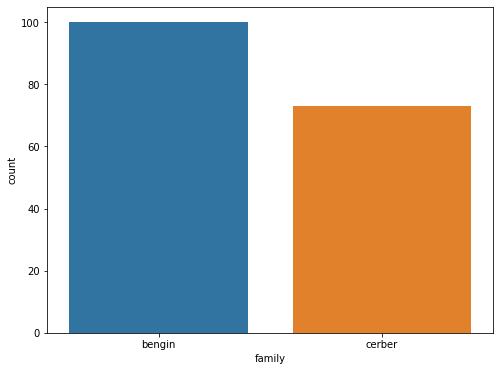

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df['family'])
ax.set_xticklabels(['bengin','cerber'])
df.family.value_counts(normalize=True) #cer와 정상 비율

In [ ]:
# train/test 분리
from sklearn.model_selection import cross_val_score, train_test_split

X = df.drop('family', axis=1)
Y = df['family']

print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

# 전체 비율 
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# 실제데이터 비율
print(X_train.value_counts(normalize=True))
print(X_test.value_counts(normalize=True))  
print(Y_train.value_counts(normalize=True))
print(Y_test.value_counts(normalize=True)) 

(173, 20) (173,)
(138, 20) (138,) (35, 20) (35,)
push    mov     call    sub    jmp    add    cmp    test   lea    pop    FindFirstFile  SearchPathW  SetFilePointer  FindResourceEx  GetFileAttributesW  SetFileAttributesW  SetFilePointerEx  CryptEncrypt  CreateThread  FindResourceExW
172     524     95      51     31     161    19     6      7      90     10449          1            4257            3               862                 1                   4189              4             8             3                  0.007246
10610   6509    1434    4403   3629   27880  3847   890    420    2063   0              0            0               0               0                   0                   0                 0             0             0                  0.007246
10168   10612   2575    2690   1092   3838   3408   1881   606    4643   254            3            387             600             843                 238                 128               78            36            600

In [ ]:
# 표준화 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler,Normalizer

# StandScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MinmaxScaler
# mms = MinMaxScaler()
# mms.fit(X_train)
# X_train = mms.transform(X_train)
# X_test = mms.transform(X_test)

# MaxAbsScaler
# mas = MaxAbsScaler()
# mas.fit(X_train)
# X_train = mas.transform(X_train)
# X_test = mas.transform(X_test)

# RobustScaler 
# rbs = RobustScaler()
# X_train = rbs.fit_transform(X_train)
# X_tes = rbs.transform(X_test)

print(X_train)
print()
print(X_test)

print(Y_train)
print()
print(Y_test)

[[-0.50600188 -0.5178807  -0.51928315 ... -0.18106638 -0.39421996
  -0.65304192]
 [-0.49333658 -0.55667033 -0.50397131 ...  0.52024466  0.52994235
   0.9361042 ]
 [ 0.44483964 -0.33285321 -0.49896647 ...  0.46508536  0.52994235
   0.93886793]
 ...
 [-0.49126629 -0.49579429 -0.47176195 ... -0.19682618 -0.2093875
   1.63809222]
 [ 4.20189822  3.11256471  4.41806523 ... -0.19682618 -0.70227406
  -0.63645953]
 [-0.32890076 -0.38007136 -0.49906558 ... -0.19682618 -0.64066324
  -0.66133312]]

[[ 5.78251557e-01 -3.38313289e-01 -4.88163946e-01  1.21593885e-01
  -4.08979653e-01  2.19268121e-01  1.81737948e-01 -2.32174115e-01
   8.42976480e-02  1.34129003e+00 -2.82396502e-01 -2.83052649e-01
  -3.91113862e-01 -6.45185094e-01 -6.97315102e-01 -5.12966806e-01
  -2.30362079e-01 -1.81066382e-01 -5.79052422e-01 -6.44750727e-01]
 [-5.15683531e-01 -2.15161577e-01 -2.97534074e-01 -2.14556368e-01
  -3.02259325e-01 -3.00764705e-01 -2.37627039e-01 -1.98669768e-01
  -4.40278262e-02 -4.85870980e-01 -2.84629813

In [ ]:
# Classification 시각화
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')
    
    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1 : (len(lines) - 4)]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().replace(' avg', '-avg').split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]
    
    plt.figure(figsize=(10,10))

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Classes')
    plt.xlabel('Metrics')
    plt.tight_layout()

# SVC 

In [ ]:
from sklearn.svm import SVC

def objective(trial):
    param_svm = {
        "C": trial.suggest_loguniform("C", 1e-5, 1e5),
        "gamma" : trial.suggest_loguniform('gamma',1e-5,1e5)
    }
    
    classifier_obj = SVC(**param_svm)

    score = cross_val_score(classifier_obj, X_train, Y_train, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print(" Value: {}".format(trial.value))

print(" Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-08-30 14:20:13,149] A new study created in memory with name: no-name-c9ac9034-9e9d-4b69-b3f8-bc5cbf6613b5
[I 2022-08-30 14:20:16,155] Trial 0 finished with value: 0.5648351648351648 and parameters: {'C': 0.0015193767438023192, 'gamma': 4.856623559093742e-05}. Best is trial 0 with value: 0.5648351648351648.
[I 2022-08-30 14:20:16,268] Trial 1 finished with value: 0.5648351648351648 and parameters: {'C': 4.581810339542245e-05, 'gamma': 0.0001999878794514847}. Best is trial 0 with value: 0.5648351648351648.
[I 2022-08-30 14:20:16,371] Trial 2 finished with value: 0.5719780219780219 and parameters: {'C': 8.17977998401688, 'gamma': 5.7916434272029936e-05}. Best is trial 2 with value: 0.5719780219780219.
[I 2022-08-30 14:20:16,455] Trial 3 finished with value: 0.8412087912087912 and parameters: {'C': 61104.38856863502, 'gamma': 10.598421109527202}. Best is trial 3 with value: 0.8412087912087912.
[I 2022-08-30 14:20:16,537] Trial 4 finished with value: 0.5648351648351648 and parameter

Number of finished trials: 100
Best trial:
 Value: 0.9054945054945056
 Params: 
    C: 2227.7801953546123
    gamma: 0.00258340623532417


In [ ]:
# 파리미터에 대한 최적인 부분 공간 분포
optuna.visualization.plot_slice(study)

In [ ]:
# 하이퍼파라미터 중요도
optuna.visualization.plot_param_importances(study)

In [ ]:
# 최적화 과정 확인
optuna.visualization.plot_optimization_history(study)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# 모델 학습

svc_c = study.best_params
clf_svc = SVC(**svc_c,probability=True)
clf_svc.fit(X_train, Y_train)

# 모델 검증

scorer = make_scorer(accuracy_score) 
print(scorer(clf_svc, X_test, Y_test))

# # 모델 예측
# y_pred = clf_svc.predict(X_test)
# clf_svc = classification_report(Y_test, y_pred)

# def get_clf_eval(Y_test, y_pred):
#     print(f"accuracy : {accuracy_score(Y_test, y_pred)*100 :.3f}")
#     print(f"precision : {precision_score(Y_test, y_pred)*100 : .3f}")
#     print(f"recall : {recall_score(Y_test, y_pred)*100 : .3f}")
#     print(f"f1 : {f1_score(Y_test, y_pred)*100 :.3f}")
    
# print(get_clf_eval(Y_test, y_pred))

# plot_classification_report(clf_svc)
# print(clf_svc)

# Predict : 예측 판단 결과만 / Predict_proba : 각 클래스별 확률 값 (정상파일, 악성파일일 확률)
# 참고 :  https://jhryu1208.github.io/data/2020/11/28/ML_uncertainty_of_prediction/ , https://imdona.tistory.com/16
# Predict_proba  사용 시 ValueError가 뜬다. 고칠려면  X, y의 shape을 일치 ( 정상, 악성)  https://lovelydiary.tistory.com/425

y_pred_proba = clf_svc.predict_proba(X_test)
print(y_pred_proba)

# preds_1d = y_pred_proba.flatten() # 차원 펴주기
# pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 2, 작으면 1

# print(Y_test.shape)
# print(pred_class.shape)

# clf_svc_2 = confusion_matrix(Y_test, pred_class)
# plot_classification_report(clf_svc_2)
# print(clf_svc_2 )


0.9142857142857143
[[1.47304009e-02 9.85269599e-01]
 [4.23796672e-02 9.57620333e-01]
 [1.17562271e-02 9.88243773e-01]
 [7.70180563e-01 2.29819437e-01]
 [2.54603877e-01 7.45396123e-01]
 [7.70220649e-01 2.29779351e-01]
 [8.31474968e-02 9.16852503e-01]
 [8.49420816e-01 1.50579184e-01]
 [7.63112769e-01 2.36887231e-01]
 [7.45374683e-02 9.25462532e-01]
 [7.74082112e-02 9.22591789e-01]
 [6.84003695e-01 3.15996305e-01]
 [9.95756660e-01 4.24334018e-03]
 [9.94927521e-01 5.07247918e-03]
 [3.00000090e-14 1.00000000e+00]
 [3.50326854e-02 9.64967315e-01]
 [2.84281150e-01 7.15718850e-01]
 [8.71426498e-01 1.28573502e-01]
 [7.85153809e-01 2.14846191e-01]
 [2.35995033e-01 7.64004967e-01]
 [9.99994278e-01 5.72160406e-06]
 [6.03235526e-02 9.39676447e-01]
 [7.70253457e-01 2.29746543e-01]
 [7.47308809e-01 2.52691191e-01]
 [2.48538385e-01 7.51461615e-01]
 [7.70180036e-01 2.29819964e-01]
 [7.69983444e-01 2.30016556e-01]
 [8.91201518e-01 1.08798482e-01]
 [9.67930220e-01 3.20697797e-02]
 [7.78171656e-01 2.21828

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def objective(trial):
    param_rf = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5)
    }

    classifier_obj = RandomForestClassifier(**param_rf)

    score = cross_val_score(classifier_obj, X_train, Y_train, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-08-25 15:56:30,422] A new study created in memory with name: no-name-1afd802c-5afb-4901-b99c-f01519dba5a5
[I 2022-08-25 15:56:33,147] Trial 0 finished with value: 0.926923076923077 and parameters: {'n_estimators': 94, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.926923076923077.
[I 2022-08-25 15:56:33,662] Trial 1 finished with value: 0.9494505494505494 and parameters: {'n_estimators': 34, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9494505494505494.
[I 2022-08-25 15:56:34,273] Trial 2 finished with value: 0.9054945054945055 and parameters: {'n_estimators': 40, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9494505494505494.
[I 2022-08-25 15:56:34,955] Trial 3 finished with value: 0.9335164835164835 and parameters: {'n_estimators': 46, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.94945

Number of finished trials: 100
Best trial:
  Value: 0.9708791208791208
  Params: 
    n_estimators: 26
    max_depth: 9
    min_samples_split: 7
    min_samples_leaf: 1


In [ ]:
# 파리미터에 대한 최적인 부분 공간 분포
optuna.visualization.plot_slice(study)

In [ ]:
# 하이퍼파라미터 중요도
optuna.visualization.plot_param_importances(study)

In [ ]:
# 최적화 과정 확인
optuna.visualization.plot_optimization_history(study)

In [ ]:
# 모델 학습

rf_best = study.best_params
clf_rf = RandomForestClassifier(**rf_best)
clf_rf.fit(X_train, Y_train)


# 모델 검증
scorer = make_scorer(accuracy_score) 
print(scorer(clf_rf, X_test, Y_test))


# # 모델 예측
# y_pred = clf_rf.predict(X_test)

# def get_clf_eval(Y_test, y_pred):
#     print(f"accuracy : {accuracy_score(Y_test, y_pred)*100 :.3f}")
#     print(f"precision : {precision_score(Y_test, y_pred)*100 : .3f}")
#     print(f"recall : {recall_score(Y_test, y_pred)*100 : .3f}")
#     print(f"f1 : {f1_score(Y_test, y_pred)*100 :.3f}")
    
# print(get_clf_eval(Y_test, y_pred))

# clf_rf = classification_report(Y_test, y_pred)
# plot_classification_report(clf_rf)
# print(clf_rf)

# Predict : 판단 결과 / Predict_proba : 각 클래스별 확률 값 ( 정상파일, 악성파일)
# 이진 분류 오류 ( 멀티클래스 문재로 오류 생김 ) 
# 참고 :  https://imdona.tistory.com/16

y_pred_proba = clf_rf.predict_proba(X_test)

print(Y_test.shape)
print(pred_class.shape)

preds_1d = y_pred_proba.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 1(악성), 작으면 0(정상)

clf_rf_2 = classification_report(Y_test, y_pred_proba)
plot_classification_report(clf_rf_2)
print(clf_rf_2)

0.9428571428571428
(35,)
(70,)


ValueError: ignored

#Stacking (미완)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import joblib


def objective(trial):
  
  param_rf = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5)
    }

  param_svm = {
        "C": trial.suggest_loguniform("C", 1e-5, 1e5),
        "gamma" : trial.suggest_loguniform('gamma',1e-5,1e5)
    }

    
  clf_svm = SVC(**param_svm,probability=True)
  clf_rf = RandomForestClassifier(**param_rf)
  classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])

  if classifier_name == "SVC":
        final_estimator = SVC()
  else:
        final_estimator = RandomForestClassifier()


  clf_svm.fit(X_train, Y_train)
  print('Fitted {}'.format(type(clf_svm).__name__))

  clf_rf.fit(X_train, Y_train)
  print('Fitted {}'.format(type(clf_rf).__name__))

  rf_pred1 = clf_rf.predict_proba(X_train)
  svm_pred1 = clf_svm.predict_proba(X_train)

  joblib.dump(clf_rf, 'rf_model.joblib')
  joblib.dump(clf_svm, 'svm_model.joblib')




study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial
  
print("  Value: {}".format(trial.value))
  
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2022-08-30 15:30:02,750] A new study created in memory with name: no-name-ff00a19b-945f-405e-af6d-159742eb2dfb
[W 2022-08-30 15:30:02,900] Trial 0 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:02,959] Trial 1 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:03,154] Trial 2 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:03,251] Trial 3 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:03,392] Trial 4 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:03,515] Trial 5 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:03,731] Trial 6 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:03,958] Trial 7 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:04,008] Trial 8 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:04,062] Trial 9 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:04,119] Trial 10 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:04,174] Trial 11 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:04,378] Trial 12 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:04,439] Trial 13 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:04,502] Trial 14 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:04,680] Trial 15 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:04,918] Trial 16 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:05,108] Trial 17 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:05,190] Trial 18 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:05,323] Trial 19 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:05,475] Trial 20 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:05,663] Trial 21 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:05,787] Trial 22 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:06,023] Trial 23 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:06,107] Trial 24 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:06,233] Trial 25 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:06,447] Trial 26 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:06,622] Trial 27 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:06,831] Trial 28 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:06,998] Trial 29 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:07,044] Trial 30 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:07,214] Trial 31 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:07,341] Trial 32 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:07,467] Trial 33 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:07,610] Trial 34 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:07,828] Trial 35 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:08,030] Trial 36 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:08,170] Trial 37 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:08,220] Trial 38 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:08,303] Trial 39 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:08,468] Trial 40 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:08,576] Trial 41 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:08,702] Trial 42 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:08,808] Trial 43 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:08,943] Trial 44 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:09,062] Trial 45 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:09,137] Trial 46 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:09,192] Trial 47 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:09,292] Trial 48 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:09,457] Trial 49 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:09,643] Trial 50 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:09,764] Trial 51 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:09,860] Trial 52 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:10,070] Trial 53 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:10,211] Trial 54 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:10,412] Trial 55 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:10,468] Trial 56 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:10,657] Trial 57 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:10,701] Trial 58 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:10,748] Trial 59 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:10,962] Trial 60 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:11,156] Trial 61 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:11,298] Trial 62 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:11,496] Trial 63 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:11,700] Trial 64 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:11,891] Trial 65 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:12,045] Trial 66 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:12,199] Trial 67 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:12,403] Trial 68 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:12,467] Trial 69 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:12,527] Trial 70 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:12,620] Trial 71 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:12,676] Trial 72 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:12,744] Trial 73 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:12,936] Trial 74 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:13,081] Trial 75 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:13,225] Trial 76 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:13,380] Trial 77 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:13,514] Trial 78 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:13,597] Trial 79 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:13,818] Trial 80 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:13,863] Trial 81 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:14,044] Trial 82 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:14,204] Trial 83 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:14,357] Trial 84 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:14,456] Trial 85 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:14,656] Trial 86 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:14,869] Trial 87 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:15,082] Trial 88 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:15,292] Trial 89 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:15,375] Trial 90 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:15,454] Trial 91 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:15,629] Trial 92 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:15,764] Trial 93 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:15,895] Trial 94 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:16,073] Trial 95 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier


[W 2022-08-30 15:30:16,307] Trial 96 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:16,376] Trial 97 failed because of the following error: The value None could not be cast to float.
[W 2022-08-30 15:30:16,419] Trial 98 failed because of the following error: The value None could not be cast to float.


Fitted SVC
Fitted RandomForestClassifier
Fitted SVC
Fitted RandomForestClassifier
Fitted SVC


[W 2022-08-30 15:30:16,597] Trial 99 failed because of the following error: The value None could not be cast to float.


Fitted RandomForestClassifier
Number of finished trials: 100
Best trial:


ValueError: ignored